## Week 8: Clustering using K-Means Algorithm

In [1]:
import numpy as mp
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Clustering the iris dataset
The Iris dataset is referred to as a “toy dataset” because it has only 150 samples and four features. The dataset describes 50 samples for each of three Iris flower species—Iris setosa, Iris versicolor and Iris virginica. Photos of these are shown below. Each sample’s fea- tures are the sepal length, sepal width, petal length and petal width, all measured in centi- meters. The sepals are the larger outer parts of each flower that protect the smaller inside petals before the flower buds bloom.

In [ ]:
# Load the iris dataset from the sklearn using load_iris()

In [3]:
#Using DESCR explore the description of the dataset



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Check the features and the targets/classes, what types are the features and targets


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
#Targets/classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# What is the shape of the datasets features


(150, 4)

In [ ]:
#What is the shape of the datasets target

(150,)

In [27]:
#Print and examine the target
#How many classes can you see?



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#Convert the features from numpy array to pandas DataFrame


In [8]:
#Print the first 10 records


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


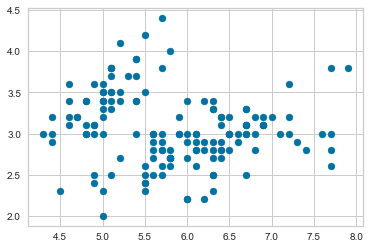

In [9]:
#Create a scatter plot to show the first and second features


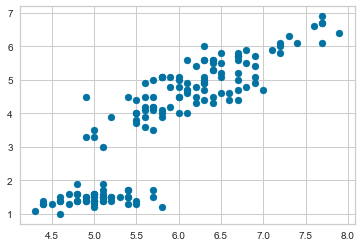

In [10]:
#Create a scatter plot to show the first and third features


In [13]:
#Scale the features using MinMaxScaler or StandardScaler
#Note that the scaler returns numpy arrays


In [14]:
# Print the arrays


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
#Compute the correlation of the features, remember to first convert 
#the features from numpy array to DataFrame

In [28]:
#Print the first 10 records


,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [17]:
#Compute the correlation


In [18]:
#Print the correlation

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [ ]:
#Which of the features correlate?

In [ ]:
#Plot the correlation using subplots

<AxesSubplot:>

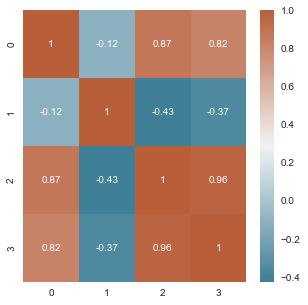

In [31]:
plt.subplots(figsize=(5,5))


In [20]:
#Convert the features back to numpy arrays


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [22]:
#Fit the model with 1 clusters setting max_iter = 1000, name the model:
#km_model_1


KMeans(max_iter=1000, n_clusters=1)

In [23]:
#Have a look at the models labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

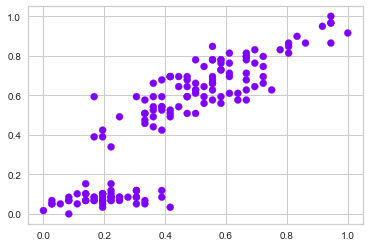

In [24]:
#Plot the scatter graph of features 1 and 2


In [25]:
# Fit the model with 2 clusters setting max_iter = 1000
# Name the model km_model_2


KMeans(max_iter=1000, n_clusters=2)

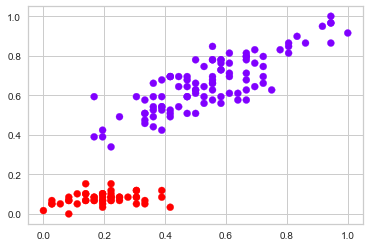

In [32]:
#Plot the scatter graph of features 1 and 2


In [33]:
# Fit the model with 3 clusters setting max_iter = 1000
# Name the model km_model_3


KMeans(max_iter=1000, n_clusters=3)

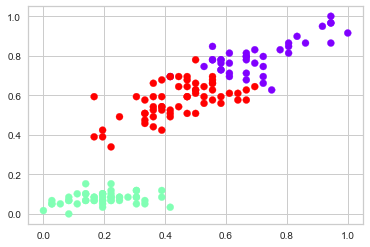

In [34]:
#Plot the scatter graph of features 1 and 2


In [35]:
#Repeat for k = 4
#Name the model km_model_4

KMeans(max_iter=1000, n_clusters=4)

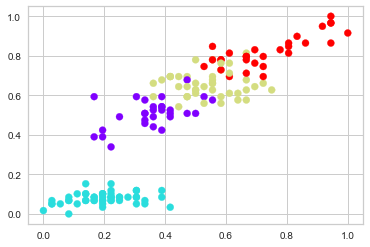

In [36]:
#Plot the scatter graph of features 1 and 2

## Use inertia to determine the best value for k

* Now fit K-Means models with cluster values ranging from 1 to 5.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

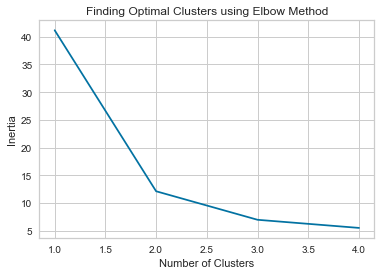

In [38]:
#Use inertia to select the best value for K. Note that Inertia is the sum of square distances of samples to their closest cluster centre
#Feel free to select any range of values to test


In [ ]:
#Which value is the optimal value and why?

In [39]:
#Print the centroids for the model with the optimal value of k

[[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.595      0.07830508 0.06083333]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


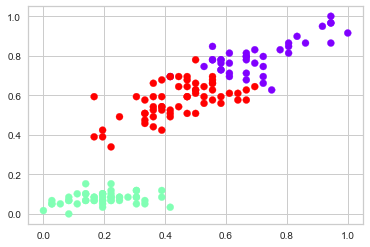

In [40]:
#Plot the scatter graph of features 1 and 2 for the model above

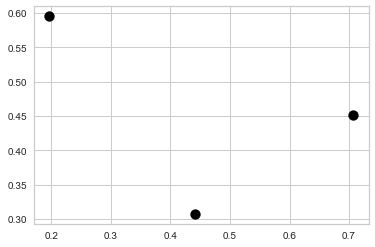

In [41]:
#Plot the scatter graph of the centriods for features 0 and 1

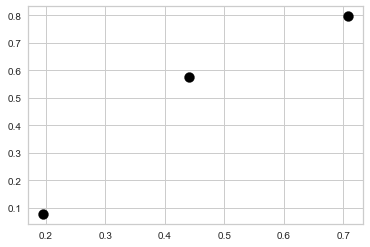

In [42]:
#Plot the scatter graph of centriods for features 0 and 2

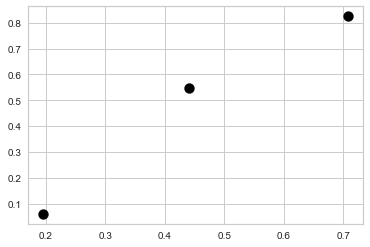

In [43]:
#Plot the scatter graph of centriods for features 0 and 3

In [44]:
#Print the centroid for the first feature

array([0.70726496, 0.19611111, 0.44125683])

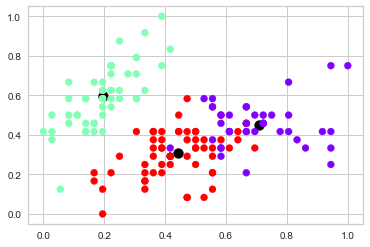

In [45]:
#Plot the scatter graph for the second feature including the centroids

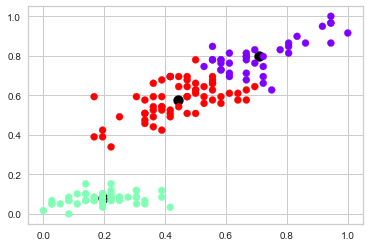

In [46]:
#Plot the scatter graph for the third feature including the centroids

In [ ]:
#Plot the scatter graph for the fourth feature including the centroids

In [47]:
#Use the model to predict labels for the clusters

In [48]:
#Print the values of the predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

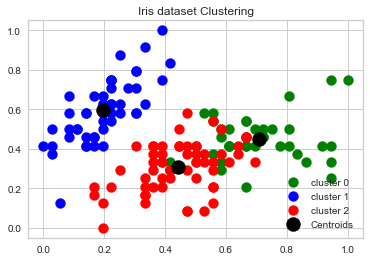

In [49]:
#Plot the scatter plot of the model with its centroids

In [ ]:
#What can you observe in the plot above?

#Compute the silhouette score.
 You can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset and the labels they were assigned

In [ ]:
#Install the yellowbrick library (if needed) for silhouette visualisation
#pip install -U yellowbrick

##Use the yellowbrick library to plot and visualise the silhouette score


In [62]:
#k=1 using init ="k-means++", what can you observe after running this cell?

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=2))

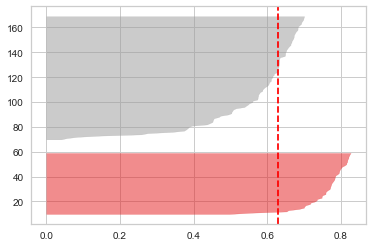

In [63]:
#k=2

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=3))

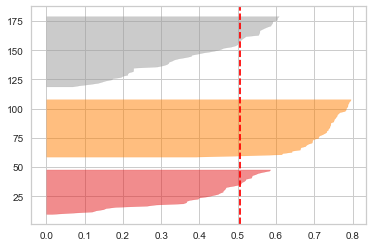

In [58]:
#k=3

In [ ]:
#k=4

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=5))

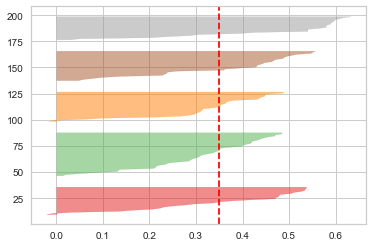

In [53]:
#k=5

SilhouetteVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=6))

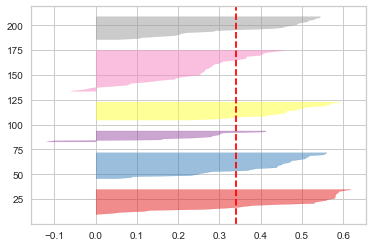

In [54]:
#k=6

## Wine dataset clustering

In [ ]:
#Final exercise for more practice

## Question 1

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* How many entries are there for the two colors and range of qualities? 
* Plot a histogram for the quality for each of the wine colors.

## Question 2

* Examine the correlation for every feature except color and quality.
* Perform any appropriate feature transformations and/or scaling.


## Question 3

* Fit a K-means clustering model with two clusters.
* Examine the clusters by wine color.

## Question 4

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?